In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

import pandas as pd
import matplotlib.pyplot as plt

In [26]:
way_file = 'C:/names'

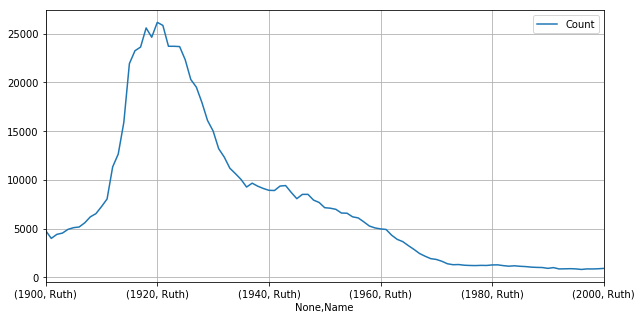

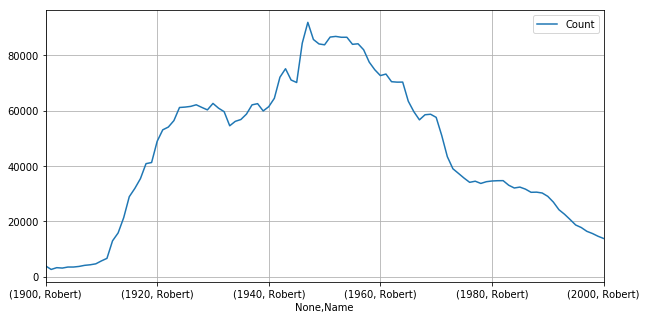

In [27]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(
        f'{way_file}/yob{year}.txt',
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
name_Ruth = names_all[names_all['Name']=='Ruth']
name_Ruth_plot = name_Ruth.groupby([name_Ruth.index, 'Name']).sum()
name_Ruth_plot.plot()
plt.grid()
name_Robert = names_all[names_all['Name']=='Robert']
name_Robert_plot = name_Robert.groupby([name_Robert.index, 'Name']).sum()
name_Robert_plot.plot()
plt.grid()

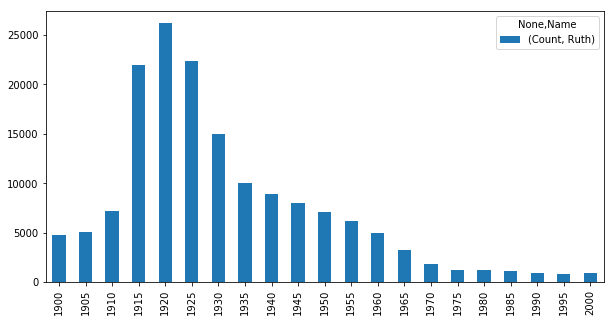

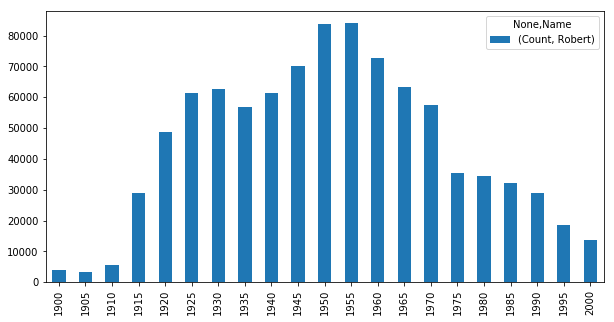

In [28]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(
        f'{way_file}/yob{year}.txt',
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
name_Ruth_1 = names_all[names_all['Name']=='Ruth']
name_Ruth_plot_1 = name_Ruth_1.groupby([name_Ruth_1.index, 'Name']).sum()
name_Robert_1 = names_all[names_all['Name']=='Robert']
name_Robert_plot_1 = name_Robert_1.groupby([name_Robert_1.index, 'Name']).sum()
name_Ruth_plot_1.unstack().plot(kind='bar')
name_Robert_plot_1.unstack().plot(kind='bar')

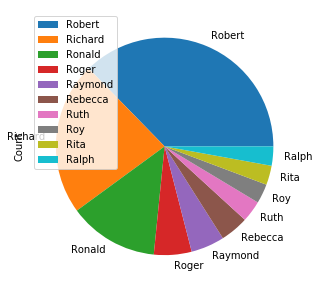

In [29]:
name_1950 = pd.read_csv(f'{way_file}/yob1950.txt', names=['Name', 'Gender', 'Count'])
name_startswith_R = []
for name in name_1950['Name']:
    if name.startswith('R'):
        name_startswith_R.append(name)
name = name_1950.loc[(name_1950['Name'].isin(name_startswith_R))]
name_dynamics = name.groupby(['Name']).sum().sort_values(by='Count', ascending=False).head(10)
name_dynamics.plot(kind='pie', y='Count')

In [30]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(
        f'{way_file}/yob{year}.txt',
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all = names_all.groupby(['Name']).sum()

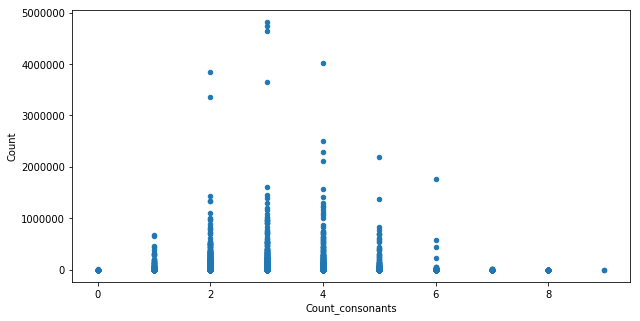

In [31]:
count_consonants = []
consonants = {'b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'z'}
for name in names_all.index:
    name_set = set(list(name.lower()))
    number_consonants = name_set.intersection(consonants)
    count_consonants.append(len(number_consonants))
names_all['Count_consonants'] = count_consonants
names_all.plot(kind='scatter', x='Count_consonants', y='Count')

In [32]:
import seaborn as sns

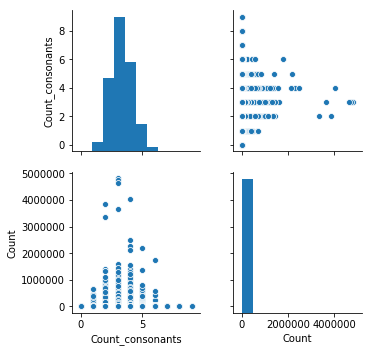

In [33]:
names_all_plot = sns.pairplot(names_all[['Count_consonants', 'Count']])
names_all_plot

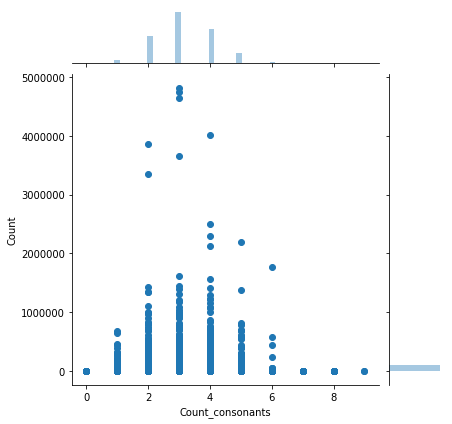

In [34]:
sns.jointplot(x='Count_consonants', y='Count', data=names_all, kind='scatter')